In [24]:
from pylab import*

In [25]:
def rungeKutta4(f, t0, x0, v0, t):
    x = [x0]
    for i in range(1, len(t)):
        h = t[i] - t[i-1]
        k1x, k1v = f(t0, x0, v0)
        k2x, k2v = f(t0 + h/2, x0 + h/2 * k1x, v0 + h/2 * k1v)
        k3x, k3v = f(t0 + h/2, x0 + h/2 * k2x, v0 + h/2 * k2v)
        k4x, k4v = f(t0 + h, x0 + h * k3x, v0 + h * k3v)
        x0 = x0 + h/6 * (k1x + 2*k2x + 2*k3x + k4x)
        v0 = v0 + h/6 * (k1v + 2*k2v + 2*k3v + k4v)
        t0 = t0 + h
        x.append(x0)
    return array(x)

In [30]:
def rungeKutta2(f, u0, t):
    x = [x0]
    h = t[1] - t[0]
    u[0] =u0
    for i in range(0, len(t)-1):
        k1x, k1v = f(t[i], u[i])
        k2x, k2v = f(t0 + h/2, x0 + h/2 * k1x, v0 + h/2 * k1v)
        x0 = x0 + h * k2x
        v0 = v0 + h * k2v
        t0 = t0 + h
        x.append(x0)
    return array(x)

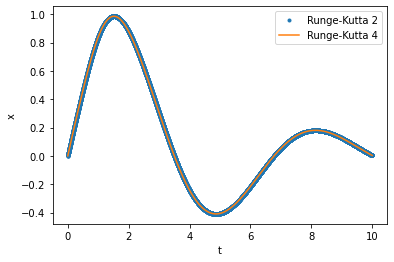

In [27]:
def f(t, x, v):
    return v, exp(-t)*sin(3*t) - 0.5*v - sin(x)
t0 = 0
x0 = 0
v0 = 1
t = linspace(0, 10, 10001)
x2 = rungeKutta2(f, t0, x0, v0, t)
x4 = rungeKutta4(f, t0, x0, v0, t)
plot(t,x2,'.',label='Runge-Kutta 2')
plot(t,x4,label='Runge-Kutta 4')
xlabel('t')
ylabel('x')
legend()
show()

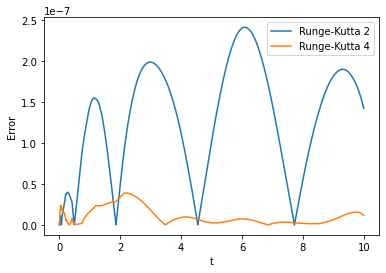

In [28]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def F(u, t):
    x, y = u
    return [y, exp(-t) * sin(3 * t) - 0.5 * y - sin(x)]

def f(t, x, v):
    return v, exp(-t)*sin(3*t) - 0.5*v - sin(x)

# Initial conditions
u0 = [0, 1]
t0 = 0
x0 = 0
v0 = 1

# Array of t values at which we need approximations
t = linspace(0, 10, 10001)

# Calculate exact solution using odeint
u = odeint(F, u0, t)
x_exact = u[:,0]

# Calculate approximations using Runge-Kutta 2
x2 = rungeKutta2(f, t0, x0, v0, t)

# Calculate approximations using Runge-Kutta 4
x4 = rungeKutta4(f, t0, x0, v0, t)

# Calculate errors
error2 = abs(x_exact - x2)
error4 = abs(x_exact - x4)
plot(t,error2,label='Runge-Kutta 2')
plot(t,error4,label='Runge-Kutta 4')
xlabel('t')
ylabel('Error')
legend()
show()

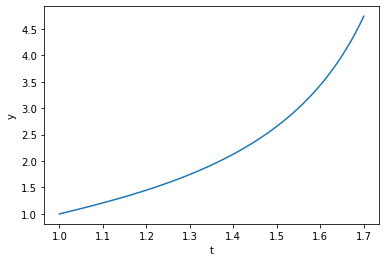

In [29]:
def rungeKutta4(f, t0, z0, t):
    z = [z0]
    for i in range(1, len(t)):
        h = t[i] - t[i-1]
        k1 = f(t0, z0)
        k2 = f(t0 + h/2, z0 + h/2 * k1)
        k3 = f(t0 + h/2, z0 + h/2 * k2)
        k4 = f(t0 + h, z0 + h * k3)
        z0 = z0 + h/6 * (k1 + 2*k2 + 2*k3 + k4)
        t0 = t0 + h
        z.append(z0)
    return np.array(z)

def f(t, z):
    z1, z2, z3 = z
    return np.array([z2,
                     z3,
                     exp(-t)*sin(3*t) - z3**2 + 3*z2**3 - cos(z1)**2])

# Initial conditions
t0 = 1
z0 = np.array([1, 2, 1])

# Array of t values at which we need approximations
t = np.linspace(1, 1.7, 101)

# Calculate approximations using Runge-Kutta 4
z = rungeKutta4(f, t0, z0, t)

# Plot solution for y
plt.plot(t,z[:,0])
plt.xlabel('t')
plt.ylabel('y')
plt.show()

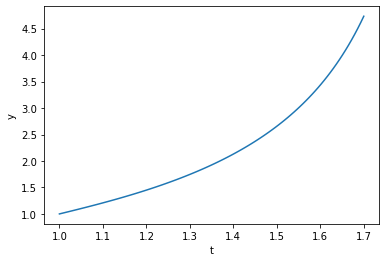

In [12]:
def rungeKutta2(f, t0, z0, t):
    z = [z0]
    for i in range(1, len(t)):
        h = t[i] - t[i-1]
        k1 = f(t0, z0)
        k2 = f(t0 + h, z0 + h * k1)
        z0 = z0 + h/2 * (k1 + k2)
        t0 = t0 + h
        z.append(z0)
    return array(z)

def f(t, z):
    z1, z2, z3 = z
    return np.array([z2,
                     z3,
                     exp(-t)*sin(3*t) - z3**2 + 3*z2**3 - cos(z1)**2])

# Initial conditions
t0 = 1
z0 = np.array([1, 2, 1])

# Array of t values at which we need approximations
t = np.linspace(1, 1.7, 101)

# Calculate approximations using Runge-Kutta 2
z = rungeKutta2(f, t0, z0, t)

# Plot solution for y
plt.plot(t,z[:,0])
plt.xlabel('t')
plt.ylabel('y')
plt.show()

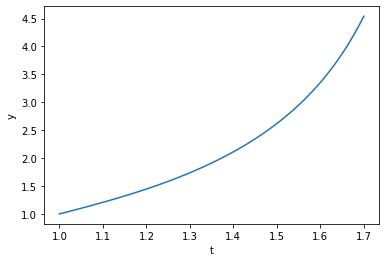

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp, sin, cos

def euler(f, t0, z0, t):
    z = [z0]
    for i in range(1, len(t)):
        h = t[i] - t[i-1]
        z0 = z0 + h * f(t0, z0)
        t0 = t0 + h
        z.append(z0)
    return np.array(z)

def f(t, z):
    z1, z2, z3 = z
    return np.array([z2,
                     z3,
                     exp(-t)*sin(3*t) - z3**2 + 3*z2**3 - cos(z1)**2])

# Initial conditions
t0 = 1
z0 = np.array([1, 2, 1])

# Array of t values at which we need approximations
t = np.linspace(1, 1.7, 101)

# Calculate approximations using Euler method
z = euler(f, t0, z0, t)

# Plot solution for y
plt.plot(t,z[:,0])
plt.xlabel('t')
plt.ylabel('y')
plt.show()

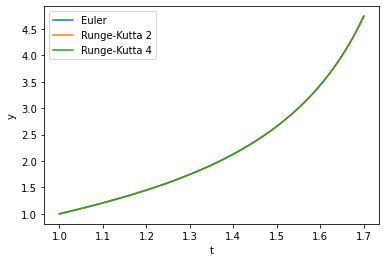

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp, sin, cos

def f(t, z):
    z1, z2, z3 = z
    return np.array([z2,
                     z3,
                     exp(-t)*sin(3*t) - z3**2 + 3*z2**3 - cos(z1)**2])

# Initial conditions
t0 = 1
z0 = np.array([1, 2, 1])

# Array of t values at which we need approximations
t = np.linspace(1, 1.7, 100001)

# Calculate approximations using Euler method
z_euler = euler(f, t0, z0, t)

# Calculate approximations using Runge-Kutta 2
z_rk2 = rungeKutta2(f, t0, z0, t)

# Calculate approximations using Runge-Kutta 4
z_rk4 = rungeKutta4(f, t0, z0, t)

# Plot solutions for y
plt.plot(t,z_euler[:,0],label='Euler')
plt.plot(t,z_rk2[:,0],label='Runge-Kutta 2')
plt.plot(t,z_rk4[:,0],label='Runge-Kutta 4')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

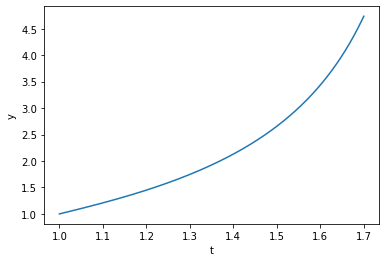

In [22]:
import numpy as np
from matplotlib.pyplot import plot, xlabel, ylabel, show

def func(t, z):
    z1, z2, z3 = z
    return [z2, z3, np.exp(-t)*np.sin(3*t) - z3**2 + 3*z2**3 - np.cos(z1)**2]

def eulerSystemSolver(z0, t):
    z = [z0]
    h = t[1] - t[0]
    for i in range(0, len(t)-1): 
        z0 = z0 + h * np.array(func(t[i], z0))
        z.append(z0)
    return np.array(z)
t0 =1
z0 = [1, 2, 1]
t = np.linspace(1, 1.7, 10000)
z = eulerSystemSolver(z0, t)
plot(t, z[:, 0])
xlabel('t')
ylabel('y')
show()